Importing required libraries.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from typing import Callable

The function we want to approximate.
$$f(x) = \frac{1}{1+25x^2}$$

In [2]:
f = lambda x : 1.0/(1+25*x**2)

The values of $n$

In [3]:
n = [4, 8, 16, 32, 64, 128]

In [4]:
pts_x = lambda n : np.linspace(-1, 1, n+1)

In [5]:
pts_y = lambda pts_x : np.array([f(x) for x in pts_x])

In [6]:
def max_err(interp : Callable, f: Callable = f,  x_l : float = -1, x_h : float = 1) -> float:
    t = np.linspace(x_l, x_h, 2000)
    errs = np.array([abs(f(v) - interp(v)) for v in t])
    return np.max(errs)

### Part I: Evenly spaced points and monomials as the basis.

Define the solver funtion that will take the interpolation points and return the interpolating function with a monomial basis.

In [7]:
def poly_interp(x : np.array, y : np.array, return_vandermonde : bool = False):
    n = len(x)
    V = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            V[i][j] = x[i]**j
    if return_vandermonde:
        return V
    
    coeff = np.dot(la.inv(V), y)
    
    def interp(x : np.array):
        g = 0
        for c in range(len(coeff)):
            g += coeff[c]*x**c
        return g
    return interp

Calculating the max errors and condition numbers for each of the $n$

In [8]:
errors = []
cond_n = []
for val in n:
    x = pts_x(val)
    y = pts_y(x)
    poly = poly_interp(x, y)
    errors.append(np.log(max_err(poly)))
    
    V = poly_interp(x, y, return_vandermonde=True)
    cond_n.append(np.log(np.linalg.cond(V)))

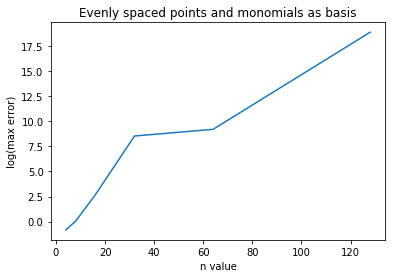

In [9]:
plt.plot(n, errors)
plt.title("Evenly spaced points and monomials as basis")
plt.xlabel("n value")
plt.ylabel("log(max error)")
plt.show()

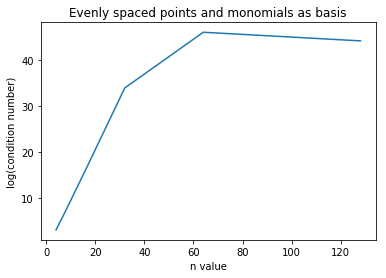

In [10]:
plt.plot(n, cond_n)
plt.title("Evenly spaced points and monomials as basis")
plt.xlabel("n value")
plt.ylabel("log(condition number)")
plt.show()

Part II: Evenly spaced points and Chebyshev polynomials as the basis

In [11]:
ch_poly = lambda x, n : np.cos(n*np.arccos(x))

In [12]:
def chebyshev_interp(x : np.array, y : np.array, return_vandermonde : bool = False):
    n = len(x)
    V = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            V[i][j] = ch_poly(x[i], n)**j
    if return_vandermonde:
        return V
    
    coeff = np.dot(la.inv(V), y)
    
    def interp(x : np.array):
        g = 0
        for i in range(len(coeff)):
            g += coeff[i]*ch_poly(x, n)**i
        return g
    return interp

In [13]:
vals = []
errors = []
cond_n = []
for val in n:
    try:
        x = pts_x(val)
        y = pts_y(x)
        poly = chebyshev_interp(x, y)
        
        V = poly_interp(x, y, return_vandermonde=True)
    except:
        pass
    else:
        vals.append(val)
        errors.append(np.log(max_err(poly)))
        cond_n.append(np.log(np.linalg.cond(V)))

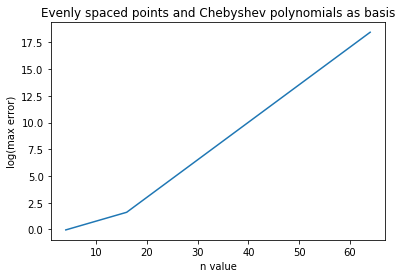

In [14]:
plt.plot(vals, errors)
plt.title("Evenly spaced points and Chebyshev polynomials as basis")
plt.xlabel("n value")
plt.ylabel("log(max error)")
plt.show()

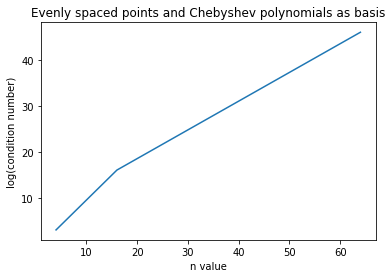

In [15]:
plt.plot(vals, cond_n)
plt.title("Evenly spaced points and Chebyshev polynomials as basis")
plt.xlabel("n value")
plt.ylabel("log(condition number)")
plt.show()

Part III: Chebyshev points and monomials as the basis

In [16]:
ch_x = lambda i, n : -1*np.cos(np.pi*i/n)

In [17]:
pts_x = lambda n : [ch_x(i, n) for i in range(n+1)]

In [18]:
errors = []
cond_n = []
for val in n:
    x = pts_x(val)
    y = pts_y(x)
    poly = poly_interp(x, y)
    errors.append(np.log(max_err(poly)))
    
    V = poly_interp(x, y, return_vandermonde=True)
    cond_n.append(np.log(np.linalg.cond(V)))

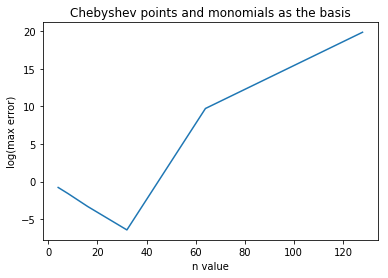

In [19]:
plt.plot(n, errors)
plt.title("Chebyshev points and monomials as the basis")
plt.xlabel("n value")
plt.ylabel("log(max error)")
plt.show()

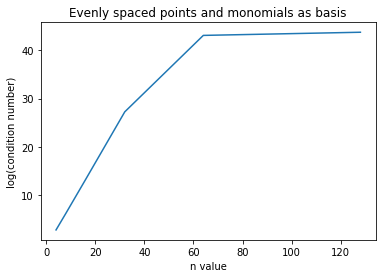

In [20]:
plt.plot(n, cond_n)
plt.title("Evenly spaced points and monomials as basis")
plt.xlabel("n value")
plt.ylabel("log(condition number)")
plt.show()

Part IV: Chebyshev points and Chebyshev polynomials as the basis.

In [21]:
vals = []
errors = []
cond_n = []
for val in n:
    try:
        x = pts_x(val)
        y = pts_y(x)
        poly = chebyshev_interp(x, y)
        
        V = poly_interp(x, y, return_vandermonde=True)
    except:
        pass
    else:
        vals.append(val)
        errors.append(np.log(max_err(poly)))
        cond_n.append(np.log(np.linalg.cond(V)))

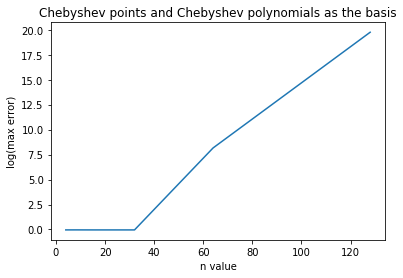

In [22]:
plt.plot(vals, errors)
plt.title("Chebyshev points and Chebyshev polynomials as the basis")
plt.xlabel("n value")
plt.ylabel("log(max error)")
plt.show()

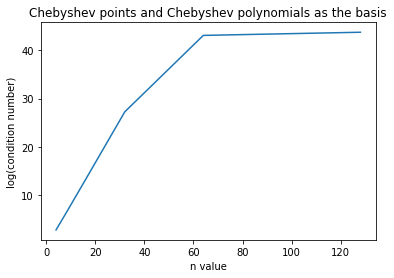

In [23]:
plt.plot(vals, cond_n)
plt.title("Chebyshev points and Chebyshev polynomials as the basis")
plt.xlabel("n value")
plt.ylabel("log(condition number)")
plt.show()

### Conclusion

I need to fix a lot of stuff.